# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


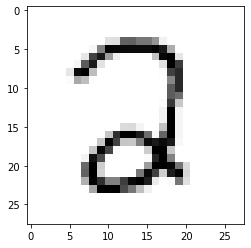

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.19979406959942048
train accuracy is: 0.7832582206643298, test accuracy is 0.8119959677419355


Epoch 10 Loss 0.05644466220783762
train accuracy is: 0.9393256551493907, test accuracy is 0.9511088709677419


Epoch 20 Loss 0.040995736771062025
train accuracy is: 0.9535970622600568, test accuracy is 0.9591733870967742


Epoch 30 Loss 0.03497041340906259
train accuracy is: 0.9605241195126022, test accuracy is 0.9632056451612904


Epoch 40 Loss 0.03154920135851716
train accuracy is: 0.9648639626105825, test accuracy is 0.9662298387096774


Epoch 50 Loss 0.02923683099831958
train accuracy is: 0.9666165915539977, test accuracy is 0.967741935483871


Epoch 60 Loss 0.027517719954585254
train accuracy is: 0.9678684693707228, test accuracy is 0.9692540322580645


Epoch 70 Loss 0.026169417703193438
train accuracy is: 0.9697880153563679, test accuracy is 0.9702620967741935


Epoch 80 Loss 0.025069285626955307
train accuracy is: 0.9707060590886329, test accuracy is 0.969758064516129


Epoch 90 Loss 0.024134477572718284
train accuracy is: 0.972041395426473, test accuracy is 0.9702620967741935


Epoch 100 Loss 0.023320158515065748
train accuracy is: 0.9731263562009681, test accuracy is 0.9707661290322581


Epoch 110 Loss 0.022578581936208087
train accuracy is: 0.9740443999332332, test accuracy is 0.9707661290322581


Epoch 120 Loss 0.021896195332978544
train accuracy is: 0.9746286095810383, test accuracy is 0.9717741935483871


Epoch 130 Loss 0.021288007215074425
train accuracy is: 0.9752962777499583, test accuracy is 0.9717741935483871


Epoch 140 Loss 0.020721806747655596
train accuracy is: 0.9764646970455684, test accuracy is 0.9727822580645161


Epoch 150 Loss 0.020193134580314288
train accuracy is: 0.9777165748622935, test accuracy is 0.9727822580645161


Epoch 160 Loss 0.019682366190288337
train accuracy is: 0.9782173259889835, test accuracy is 0.9737903225806451


Epoch 170 Loss 0.019194001388069332
train accuracy is: 0.9785511600734434, test accuracy is 0.9737903225806451


Epoch 180 Loss 0.01873523109697184
train accuracy is: 0.9789684526790186, test accuracy is 0.9737903225806451


Epoch 190 Loss 0.01829247346677888
train accuracy is: 0.9794692038057086, test accuracy is 0.9747983870967742


Epoch 200 Loss 0.01785821577876987
train accuracy is: 0.9803037890168587, test accuracy is 0.9747983870967742


Epoch 210 Loss 0.017439967981371332
train accuracy is: 0.9806376231013186, test accuracy is 0.9753024193548387


Epoch 220 Loss 0.017027381571687178
train accuracy is: 0.9817225838758137, test accuracy is 0.9753024193548387


Epoch 230 Loss 0.016619649743307013
train accuracy is: 0.9823902520447337, test accuracy is 0.9758064516129032


Epoch 240 Loss 0.01622701721320243
train accuracy is: 0.9826406276080788, test accuracy is 0.9758064516129032


0.0034411259561027176

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.24177968390689306
train accuracy is: 0.6990485728592889, test accuracy is 0.717741935483871


Epoch 10 Loss 0.10236034525344614
train accuracy is: 0.9110332164914038, test accuracy is 0.9203629032258065


Epoch 20 Loss 0.07944560621072173
train accuracy is: 0.9277249207144049, test accuracy is 0.936491935483871


Epoch 30 Loss 0.06872629181442706
train accuracy is: 0.9364046069103655, test accuracy is 0.9450604838709677


Epoch 40 Loss 0.06218972250289185
train accuracy is: 0.9403271574027708, test accuracy is 0.9511088709677419


Epoch 50 Loss 0.05769025791725041
train accuracy is: 0.943081288599566, test accuracy is 0.9536290322580645


Epoch 60 Loss 0.05435935492876163
train accuracy is: 0.9450842931063261, test accuracy is 0.9571572580645161


Epoch 70 Loss 0.05177372774056411
train accuracy is: 0.9472542146553163, test accuracy is 0.9606854838709677


Epoch 80 Loss 0.049692574324451594
train accuracy is: 0.9488399265565014, test accuracy is 0.9611895161290323


Epoch 90 Loss 0.047972999396214744
train accuracy is: 0.9500918043732265, test accuracy is 0.9616935483870968


Epoch 100 Loss 0.04652078764519678
train accuracy is: 0.9515940577532966, test accuracy is 0.9632056451612904


Epoch 110 Loss 0.04527406772417963
train accuracy is: 0.9524286429644466, test accuracy is 0.9632056451612904


Epoch 120 Loss 0.04418833874873516
train accuracy is: 0.9536805207811717, test accuracy is 0.9632056451612904


Epoch 130 Loss 0.04323184092286589
train accuracy is: 0.9546820230345519, test accuracy is 0.9632056451612904


Epoch 140 Loss 0.04238052106760948
train accuracy is: 0.9555166082457018, test accuracy is 0.9637096774193549


Epoch 150 Loss 0.04161637089582939
train accuracy is: 0.956100817893507, test accuracy is 0.9642137096774194


Epoch 160 Loss 0.0409254128208608
train accuracy is: 0.956851944583542, test accuracy is 0.9652217741935484


Epoch 170 Loss 0.04029575507463054
train accuracy is: 0.957018861625772, test accuracy is 0.9647177419354839


Epoch 180 Loss 0.039720580117027414
train accuracy is: 0.957603071273577, test accuracy is 0.9652217741935484


Epoch 190 Loss 0.03919106162365477
train accuracy is: 0.9578534468369221, test accuracy is 0.9652217741935484


Epoch 200 Loss 0.038701578027493334
train accuracy is: 0.9581872809213821, test accuracy is 0.9647177419354839


Epoch 210 Loss 0.03824735965700778
train accuracy is: 0.9588549490903021, test accuracy is 0.9652217741935484


Epoch 220 Loss 0.03782423848860035
train accuracy is: 0.9594391587381071, test accuracy is 0.9672379032258065


Epoch 230 Loss 0.03742932580980939
train accuracy is: 0.9598564513436821, test accuracy is 0.9682459677419355


Epoch 240 Loss 0.03705779129593205
train accuracy is: 0.9602737439492572, test accuracy is 0.9682459677419355


0.0836676890660884

### Comparing results of NN and LR

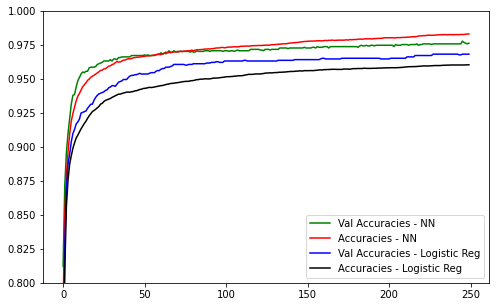

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

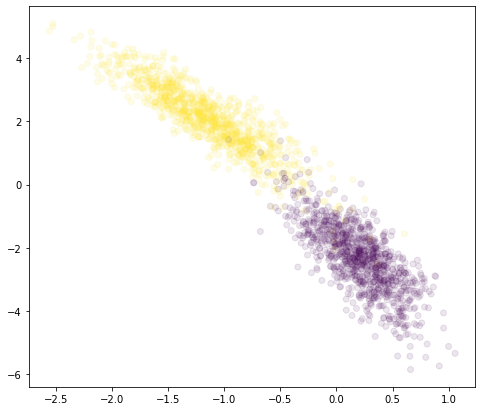

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

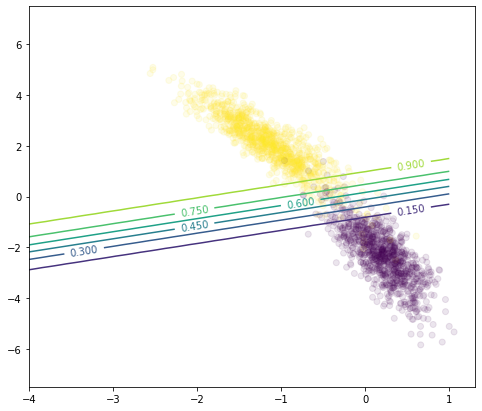

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );